In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from scipy.optimize import curve_fit
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
def f(x,p0,p1,p2,p3):
    return p0 + p1*x + p2*x**2 + p3*x**3

def fit_ploy(x,y):
    popt, pcov = curve_fit(f,x,y)
    x_new = np.linspace(x.min(),x.max(),300)
    return (x_new, f(x_new, *popt))

In [3]:
def make_interp(x,y):
    x,y = sort([x,y])
    x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    spl = make_interp_spline(x, y, k=1) #BSpline object
    y_smooth = spl(x_new)
    return (x_new, y_smooth)

In [4]:
def sort(lst, sort_by_y=False):
    if len(lst)==3:
        x, y, err = lst
    elif len(lst)==2:
        x, y = lst
        
    if not sort_by_y:
        p = x.argsort()
    else:
        p = y.argsort()
    x=x[p]
    y=y[p]
    if len(lst)==3:
        err=err[p]
    
    if len(lst)==3:
        return (x,y,err)
    elif len(lst)==2:
        return (x,y)

In [5]:
# read data
Babkevich_exp_x, Babkevich_exp_y = sort(np.genfromtxt(r'data\Babkevich_exp.txt',unpack=True),sort_by_y=True)
Babkevich_mf_hf_x, Babkevich_mf_hf_y = sort(np.genfromtxt(r'data\Babkevich_mf_hf.txt',unpack=True))
Babkevich_mf_no_hf_x, Babkevich_mf_no_hf_y = sort(np.genfromtxt(r'data\Babkevich_mf_no_hf.txt',unpack=True))
Chakraborty_hf_x, Chakraborty_hf_y = sort(np.genfromtxt(r'data\Chakraborty_hf.txt',unpack=True))
Chakraborty_no_hf_x, Chakraborty_no_hf_y = sort(np.genfromtxt(r'data\Chakraborty_no_hf.txt',unpack=True))
Dunn_Magnetostriction_x, Dunn_Magnetostriction_y, Dunn_Magnetostriction_y_err = sort(np.genfromtxt(r'data\Dunn_Magnetostriction.txt',unpack=True))
Dunn_Thermal_expansion_x, Dunn_Thermal_expansion_y, Dunn_Thermal_expansion_x_err = sort(np.genfromtxt(r'data\Dunn_Thermal_expansion.txt',unpack=True))
Ronnow_exp_x, Ronnow_exp_y = sort(np.genfromtxt(r'data\Ronnow_exp.txt',unpack=True))
Ronnow_mf1_x, Ronnow_mf1_y = sort(np.genfromtxt(r'data\Ronnow_mf1.txt',unpack=True))
Ronnow_mf2_x, Ronnow_mf2_y = sort(np.genfromtxt(r'data\Ronnow_mf2.txt',unpack=True))
Bitko_mf_x, Bitko_mf_y = sort(np.genfromtxt(r'data\Bitko_mf.txt',unpack=True))

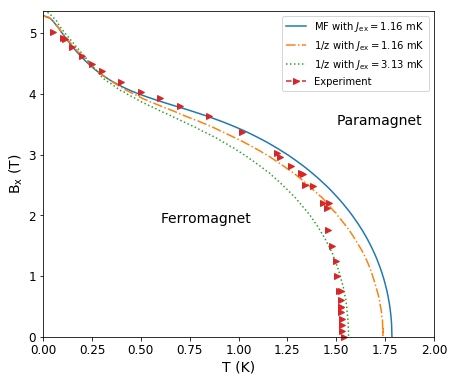

In [10]:

plt.close()
fig=plt.figure(figsize=(7,6))
plt.plot(Babkevich_mf_hf_x, Babkevich_mf_hf_y, '-', label='MF with $J_{\mathrm{ex}}=1.16\ \mathrm{mK}$')
# plt.plot(Babkevich_mf_no_hf_x, Babkevich_mf_no_hf_y, '-', label='Babkevich_mf_no_hf')
plt.plot(Ronnow_mf1_x, Ronnow_mf1_y, '-.', label='1/z with $J_{\mathrm{ex}}=1.16\ \mathrm{mK}$')
plt.plot(Ronnow_mf2_x, Ronnow_mf2_y, ':', label='1/z with $J_{\mathrm{ex}}=3.13\ \mathrm{mK}$')
# plt.plot(Bitko_mf_x, Bitko_mf_y, '--', label='Bitko et al. MF')

# make smooth lines:
#Babkevich_mf_hf_x, Babkevich_mf_hf_y = make_interp(Babkevich_mf_hf_x, Babkevich_mf_hf_y)
#Babkevich_mf_no_hf_x, Babkevich_mf_no_hf_y = make_interp(Babkevich_mf_no_hf_x, Babkevich_mf_no_hf_y)
Chakraborty_hf_x_guide, Chakraborty_hf_y_guide = make_interp(Chakraborty_hf_x,Chakraborty_hf_y)
Chakraborty_no_hf_x_guide, Chakraborty_no_hf_y_guide = make_interp(Chakraborty_no_hf_x,Chakraborty_no_hf_y)
#Ronnow_mf1_x, Ronnow_mf1_y = make_interp(Ronnow_mf1_x, Ronnow_mf1_y)
#Ronnow_mf2_x, Ronnow_mf2_y = make_interp(Ronnow_mf2_x, Ronnow_mf2_y)

# chakraborty_hf_plt = plt.plot(Chakraborty_hf_x_guide, Chakraborty_hf_y_guide, '--')
# line=plt.plot(Chakraborty_hf_x, Chakraborty_hf_y, 's', fillstyle='none', label='QMC', color=chakraborty_hf_plt[0].get_color(),clip_on=False)
# chakraborty_no_hf_plt = plt.plot(Chakraborty_no_hf_x_guide, Chakraborty_no_hf_y_guide, '--')
# plt.plot(Chakraborty_no_hf_x, Chakraborty_no_hf_y, '^', fillstyle='none', label='Chakraborty_no_hf', color=chakraborty_no_hf_plt[0].get_color())
plt.plot(Babkevich_exp_x,Babkevich_exp_y, '>', label='Experiment',clip_on=False)


plt.ylabel(r'$\mathrm{B_x}$ (T)',fontsize=14)
plt.xlabel(r'T (K)',fontsize=14)
#lgnd=plt.legend(markerscale=0.6,prop={'size': 13})
lgnd=plt.legend()
# print(list(lgnd.legendHandles))
# for i in range(len(list(lgnd.legendHandles))):
#     try:
#         lgnd.legendHandles[i]._legmarker.set_markersize(10)
#         lgnd.legendHandles[i]._legmarker.set_mew(3)
#     except:
#         print(lgnd.legendHandles[i].findobj())
#         lgnd.legendHandles[i]._legmarker.set_markersize(10)
# #         lgnd.legendHandles[i].get_children()[0]._legmarker.set_mew(3)


ax=plt.gca()
ax.set_xlim([0,2])
ax.text(0.3, 0.35, 'Ferromagnet', transform=ax.transAxes,fontsize=14)
ax.text(0.75, 0.65, 'Paramagnet', transform=ax.transAxes,fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.margins(0)

'''
# inset1
ax2 = fig.add_axes([0.37, 0.16, 0.15, 0.3])
ax2.errorbar(res_w[:,0],res_w[:,2],xerr=res_w[:,1],marker='x',linestyle='none', ms=17, mew=4, label='with ODD', color=line1[0].get_color())
ax2.errorbar(res_wo[:,0],res_wo[:,2],xerr=res_wo[:,1],marker='x',linestyle='none', mew=4,ms=17, label='without ODD', color=line2[0].get_color())
#-(-res_w[0,0]+res_wo[0,0])
ax2.plot(xnew,ronnow_fit_smooth,linestyle='-',mec='blue',color='blue',linewidth=5, label='Ronnow-fit')
ax2.plot(T,ronnow_exp,marker='>',mec='indianred',mew=7,ms=17,mfc='none',linestyle='none',label='Experimantal')
ax2.set_xlim(1.75,1.8)
ax2.set_ylim(-0.01,0.34)

# inset2
ax3 = fig.add_axes([0.17, 0.16, 0.15, 0.3])
ax3.errorbar(res_w[:,0],res_w[:,2],xerr=res_w[:,1],marker='x',linestyle='none', ms=17, mew=4, label='w/ mechanism', color=line1[0].get_color())
ax3.errorbar(res_wo[:,0],res_wo[:,2],xerr=res_wo[:,1],marker='x',linestyle='none', mew=4,ms=17, label='w/o mechanism', color=line2[0].get_color())
#-(-res_w[0,0]+res_wo[0,0])
ax3.plot(xnew,ronnow_fit_smooth,linestyle='-',mec='blue',color='blue',linewidth=5, label='Ronnow-fit')
ax3.plot(T,ronnow_exp,marker='>',mec='indianred',mew=7,ms=17,mfc='none',linestyle='none',label='Experimantal')
ax3.set_xlim(1.52,1.6)
ax3.set_ylim(-0.01,0.34)
'''

lgnd.legendHandles[3].set_linestyle('--')

# fig.savefig(r'figures\phase_diagram_full.eps',format='eps')
plt.show()

<IPython.core.display.Javascript object>


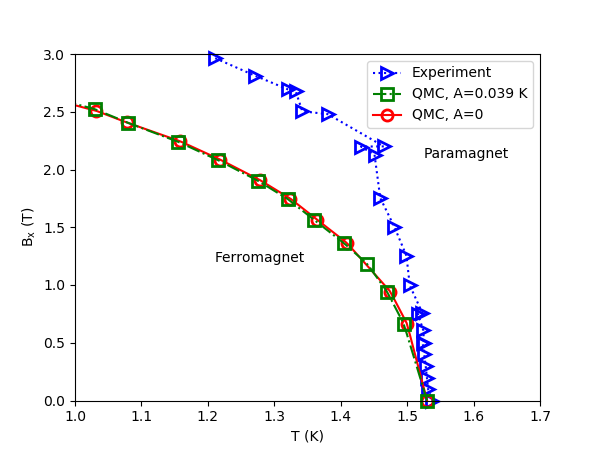

In [209]:
min_x=1.
max_y=3.
Babkevich_exp_y=Babkevich_exp_y[Babkevich_exp_x>min_x]
Babkevich_exp_x=Babkevich_exp_x[Babkevich_exp_x>min_x]
Babkevich_exp_x=Babkevich_exp_x[Babkevich_exp_y<max_y]
Babkevich_exp_y=Babkevich_exp_y[Babkevich_exp_y<max_y]

Chakraborty_no_hf_y=Chakraborty_no_hf_y[Chakraborty_no_hf_x>min_x]
Chakraborty_no_hf_x=Chakraborty_no_hf_x[Chakraborty_no_hf_x>min_x]
Chakraborty_no_hf_x=Chakraborty_no_hf_x[Chakraborty_no_hf_y<max_y]
Chakraborty_no_hf_y=Chakraborty_no_hf_y[Chakraborty_no_hf_y<max_y]

Chakraborty_hf_y=Chakraborty_hf_y[Chakraborty_hf_x>min_x]
Chakraborty_hf_x=Chakraborty_hf_x[Chakraborty_hf_x>min_x]
Chakraborty_hf_x=Chakraborty_hf_x[Chakraborty_hf_y<max_y]
Chakraborty_hf_y=Chakraborty_hf_y[Chakraborty_hf_y<max_y]

plt.close()
fig=plt.figure(figsize=(6,4.5))

line1=plt.plot(Babkevich_exp_x,Babkevich_exp_y, marker='>', color='blue',mew=2,ms=8, mfc='none',  linestyle=':', label='Experiment', clip_on=False)

# new_x=np.concatenate((Dunn_Magnetostriction_x,Dunn_Thermal_expansion_x,Babkevich_exp_x))
# new_y=np.concatenate((Dunn_Magnetostriction_y,Dunn_Thermal_expansion_y,Babkevich_exp_y))
# new_y=new_y[(new_x>1.4) & (new_x<1.7)]
# new_x=new_x[(new_x>1.4) & (new_x<1.7)]
# exp_guide_x, exp_guide_y = fit_ploy(new_x,new_y)

# plt.plot(exp_guide_x,exp_guide_y,':')

chakraborty_no_hf_plt = plt.plot(Chakraborty_no_hf_x_guide, Chakraborty_no_hf_y_guide, '-', color='red')
line3=plt.plot(Chakraborty_no_hf_x, Chakraborty_no_hf_y, 'o', fillstyle='none', ms=8, mew=2, label='QMC, A=0', color=chakraborty_no_hf_plt[0].get_color(), clip_on=False)
chakraborty_hf_plt = plt.plot(Chakraborty_hf_x_guide, Chakraborty_hf_y_guide, '-.', color='green')
line2=plt.plot(Chakraborty_hf_x, Chakraborty_hf_y, 's', fillstyle='none', ms=8, mew=2, label='QMC, A=0.039 K', color=chakraborty_hf_plt[0].get_color(), clip_on=False)

plt.ylabel(r'$\mathrm{B_x}$ (T)')
plt.xlabel(r'T (K)')


lgnd_line1 = Line2D([0],[0])
lgnd_line1.update_from(line1[0])
lgnd_line1.set_linestyle(':')
legend_elements = [lgnd_line1,line2[0],line3[0]]
lgnd_line2 = Line2D([0],[0])
lgnd_line2.update_from(line2[0])
lgnd_line2.set_linestyle('-.')
lgnd_line3 = Line2D([0],[0])
lgnd_line3.update_from(line3[0])
lgnd_line3.set_linestyle('-')

legend_elements = [lgnd_line1,lgnd_line2,lgnd_line3]
lgnd=plt.legend(handles=legend_elements)

ax=plt.gca()
ax.set_xlim([1,1.7])
ax.set_ylim([0,3.0])
ax.text(0.3, 0.4, 'Ferromagnet', transform=ax.transAxes)
ax.text(0.75, 0.7, 'Paramagnet', transform=ax.transAxes)

plt.margins(0)
fig.savefig(r'figures\phase_diagram_close.eps',format='eps')
# plt.show()

In [88]:
%matplotlib notebook